# Laptop Price Prediction
* Bu projede özelliklerine göre dizüstü bilgisayar fiyatlarını tahmin edecek bir Regresyon modeli geliştirilecektir.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxYDFIp95y6F4MERuOM5OQR_F8SyHFDN7FnBzCoVtrVv4nT7zJRlVUDQJvSpFuUgIwKEo&usqp=CAU">

### Veri Setini İnceleyelim

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100) # 100 adet sütun görmek için

In [2]:
df = pd.read_csv("laptop_data.csv", index_col=0)

In [3]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [5]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

Company alanı kategoriye çevrilerek dummy uygulaması yeterli olur

In [6]:
df["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [7]:
df.TypeName.value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

TypeName alanı da kategoriye çevrilerek dummy uygulaması yeterli olur

In [8]:
df.Inches.value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [9]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

ScreenResolution alanı kullanılarak yeni alanlar oluşturulabilir:
* IPS Panel (1/0)
* Touchscreen (1/0)
* HD (1/0) İhtiyaca göre burası çeşitlendirilebilir (Full HD / Ultra HD ..)
* Resolution (2400*1600/10000=384)

In [10]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

Cpu alanından yeni alanlar üretilebilir:
* CpuBrand (Intel / AMD ...)
* CpuModel (Core i5 7200U / A9-Series 9420 ...)
* CpuFrequency (2.5Ghz ...)

In [11]:
df.Ram.value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

Ram alanının tamamı GB büyüklüğünde. Doğrudan sayıya çevrilebilir

In [12]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

Memory alanından yeni alanlar üretilebilir:
* MemoryHDD (0/1)
* MemorySSD (0/1)
* MemoryFlash (0/1)
* MemoryHDDSize
* MemorySSDSize
* MemoryFlashSize

In [13]:
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

Gpu alanı için de yeni alanlar oluşturulabilir:
* GPuBrand
* GpuModel

In [14]:
df.OpSys.value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

OpSys alanından yeni bir alan oluşturulabilir:
* OpSysPrice (0/1) İşletim sistemi ücretli mi ücretsiz mi

In [15]:
df.Weight.value_counts()

Weight
2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

Weight alanı sayıya çevrilebilir

### Feature Engineering
1. Yeni alanlar oluşturma
2. Object alanları Category türüne çevirme

In [16]:
import numpy as np

In [17]:
# ScreenResolution alanı kullanılarak yeni alanlar oluşturalım:
df['IPS_Panel'] = np.where(df["ScreenResolution"].str.contains('IPS Panel'), 1, 0) 
df['Touchscreen'] = np.where(df["ScreenResolution"].str.contains('Touchscreen'), 1, 0) 
df['HD'] = np.where(df["ScreenResolution"].str.contains('HD'), 1, 0) 
df['Resolution']= df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df['Resolution'] = df['Resolution'].str.split('x').apply(lambda x: int(x[0]) * int(x[1]) / 10000)

In [18]:
# Cpu alanından yeni alanlar oluşturalım:
df['CpuBrand'] = df["Cpu"].str.split().apply(lambda x: x[0])
df['CpuModel'] = df["Cpu"].str.split().apply(lambda x: ' '.join(x[1:-1]))
df['CpuFrequency'] = df["Cpu"].str.split().apply(lambda x: x[-1])

In [19]:
# Weight alanını sayıya çevirelim
df['Weight'] = df['Weight'].apply(lambda x: float(x.split("kg")[0]))

In [20]:
# Ram alanını sayıya çevirelim
df['Ram'] = df['Ram'].apply(lambda x: int(x.split("GB")[0]))

In [21]:
# Memory alanından yeni alanlar üretelim:
df['SSD'] = df['Memory'].apply(lambda x: 1 if 'SSD' in x else 0)
df['HDD'] = df['Memory'].apply(lambda x: 1 if 'HDD' in x else 0)
df['FlashStorage'] = df['Memory'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
df['SSDCapacity'] = df['Memory'].apply(lambda x: ' '.join([part.strip() for part in x.split('SSD') if part.strip()]) if 'SSD' in x else '')
df['HDDCapacity'] = df['Memory'].apply(lambda x: ' '.join([part.strip() for part in x.split('HDD') if part.strip()]) if 'HDD' in x else '')
df['FlashCapacity'] = df['Memory'].apply(lambda x: ' '.join([part.strip() for part in x.split('Flash Storage') if part.strip()]) if 'Flash Storage' in x else '')

In [22]:
# SSD kapasitelerini toplayalım ve GB cinsinden temsil edelim
df['SSDCapacity'] = df['SSDCapacity'].apply(lambda x: sum([int(part.strip().replace('GB', '')) if 'GB' in part else int(part.strip().replace('TB', '')) * 1024 for part in str(x).split('+') if 'HDD' not in part and 'Hybrid' not in part]) if x and 'Flash Storage' not in str(x) else '')

In [23]:
# HDD kapasitelerini toplayalım ve GB cinsinden temsil edelim
df['HDDCapacity'] = df['HDDCapacity'].apply(lambda x: sum([int(float(part.strip().replace('GB', ''))) if 'GB' in part else int(float(part.strip().replace('TB', ''))) * 1024 for part in str(x).split('+') if 'SSD' not in part and 'Hybrid' not in part]) if x and 'Flash Storage' not in str(x) else '')

In [24]:
# Flash Storage kapasitelerini toplayalım ve GB cinsinden temsil edelim
df['FlashCapacity'] = df['FlashCapacity'].apply(lambda x: sum([int(float(part.strip().replace('GB', ''))) if 'GB' in part else int(float(part.strip().replace('TB', ''))) * 1024 for part in str(x).split('+') if 'SSD' not in part and 'HDD' not in part]) if x and 'Hybrid' not in str(x) else '')

In [25]:
# Object türündeki alanı sayıya çevirme
df['SSDCapacity'] = pd.to_numeric(df['SSDCapacity'], errors='coerce')
df['HDDCapacity'] = pd.to_numeric(df['HDDCapacity'], errors='coerce')
df['FlashCapacity'] = pd.to_numeric(df['FlashCapacity'], errors='coerce')

In [26]:
# Boşlukları 0 ile dolduralım
df['SSDCapacity']   = df['SSDCapacity'].fillna(0)
df['HDDCapacity']   = df['HDDCapacity'].fillna(0)
df['FlashCapacity'] = df['FlashCapacity'].fillna(0)

In [27]:
# Gpu alanı için de yeni alanlar oluşturulabilir:
df['GpuBrand'] = df['Gpu'].apply(lambda x: x.split()[0] if x else '')
df['GpuModel'] = df['Gpu'].apply(lambda x: x.split()[1] if x else '')

In [28]:
# İşletim sisteminin ücretli olup olmadığını ayıralım
df['OsType'] = df['OpSys'].apply(lambda x: 0 if x in ['No OS', 'Linux', 'Chrome OS', 'Android'] else 1)

In [29]:
# Object türündeki alanları kategoriye çevirelim
object_columns = ["Company", "TypeName", "CpuBrand", "CpuModel", "CpuFrequency", "GpuBrand", "GpuModel"] 
df[object_columns] = df[object_columns].astype('category')

In [30]:
# İhtiyaç kalmayan alanları kaldıralım
drop_columns=["ScreenResolution", "Cpu", "Memory", "Gpu", "OpSys", "Resolution"]
df.drop(drop_columns, axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company        1303 non-null   category
 1   TypeName       1303 non-null   category
 2   Inches         1303 non-null   float64 
 3   Ram            1303 non-null   int64   
 4   Weight         1303 non-null   float64 
 5   Price          1303 non-null   float64 
 6   IPS_Panel      1303 non-null   int32   
 7   Touchscreen    1303 non-null   int32   
 8   HD             1303 non-null   int32   
 9   CpuBrand       1303 non-null   category
 10  CpuModel       1303 non-null   category
 11  CpuFrequency   1303 non-null   category
 12  SSD            1303 non-null   int64   
 13  HDD            1303 non-null   int64   
 14  FlashStorage   1303 non-null   int64   
 15  SSDCapacity    1303 non-null   float64 
 16  HDDCapacity    1303 non-null   float64 
 17  FlashCapacity  1303 non-null   float64

In [32]:
abs(df.corr(numeric_only=True)['Price']).sort_values(ascending=False)

Price            1.000000
Ram              0.743007
SSDCapacity      0.670682
SSD              0.513609
HD               0.377209
OsType           0.281860
IPS_Panel        0.252208
FlashStorage     0.210823
Weight           0.210370
Touchscreen      0.191226
HDD              0.169901
HDDCapacity      0.096733
Inches           0.068197
FlashCapacity    0.040511
Name: Price, dtype: float64

### Regresyon Modeli Oluşturalım

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        ab=AdaBoostRegressor()
        rf=RandomForestRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,ab,rf]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting',
                    'KNeighbors','Decision Tree','XGBRegressor', 'AdaBoost', 'Random Forest']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [34]:
x=df.drop(["Price", "FlashCapacity"], axis=1)
y=df[["Price"]]

x=pd.get_dummies(x, drop_first=True)
x.shape, y.shape

((1303, 171), (1303, 1))

In [35]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Random Forest,0.815517,16309.602468,10128.389358
Gradient Boosting,0.814957,16334.305498,10627.400649
XGBRegressor,0.803610,16827.671001,9949.947296
Ridge,0.799451,17004.927648,12005.215781
Linear,0.797280,17096.719082,12286.907961
Lasso,0.796962,17110.132414,12225.940675
Decision Tree,0.722703,19995.721398,12375.524221
KNeighbors,0.688140,21205.320535,11685.094830
Extra Tree,0.681762,21421.053985,12974.637407
ElasticNet,0.681551,21428.152696,14677.800676


### İnce Ayar Yapalım

In [36]:
import seaborn as sns

In [37]:
abs(df.corr(numeric_only=True)['Price']).sort_values(ascending=False)

Price            1.000000
Ram              0.743007
SSDCapacity      0.670682
SSD              0.513609
HD               0.377209
OsType           0.281860
IPS_Panel        0.252208
FlashStorage     0.210823
Weight           0.210370
Touchscreen      0.191226
HDD              0.169901
HDDCapacity      0.096733
Inches           0.068197
FlashCapacity    0.040511
Name: Price, dtype: float64

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.10,14.00,15.60,15.6000,18.40
Ram,1303.0,8.382195,5.084665,2.00,4.00,8.00,8.0000,64.00
Weight,1303.0,2.038734,0.665475,0.69,1.50,2.04,2.3000,4.70
Price,1303.0,59870.042910,37243.201786,9270.72,31914.72,52054.56,79274.2464,324954.72
IPS_Panel,1303.0,0.280123,0.449231,0.00,0.00,0.00,1.0000,1.00
Touchscreen,1303.0,0.147352,0.354593,0.00,0.00,0.00,0.0000,1.00
HD,1303.0,0.702993,0.457115,0.00,0.00,1.00,1.0000,1.00
SSD,1303.0,0.646969,0.478096,0.00,0.00,1.00,1.0000,1.00
HDD,1303.0,0.442057,0.496822,0.00,0.00,0.00,1.0000,1.00
FlashStorage,1303.0,0.057559,0.232998,0.00,0.00,0.00,0.0000,1.00


<Axes: xlabel='Ram'>

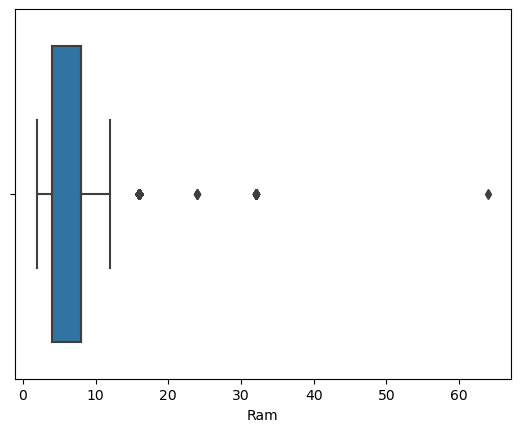

In [39]:
sns.boxplot(x=df["Ram"])

In [40]:
df=df[df["Ram"]<30]

<Axes: xlabel='Weight'>

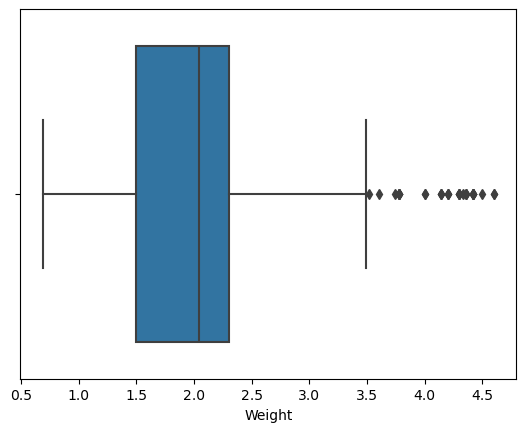

In [41]:
sns.boxplot(x=df["Weight"])

In [42]:
df=df[df["Weight"]<4.1]

In [43]:
x=df.drop(["Price", "FlashCapacity"], axis=1)
y=df[["Price"]]
x=pd.get_dummies(x, drop_first=True)
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.847324,12542.841399,7960.322451
Random Forest,0.838490,12900.598674,8417.584073
Gradient Boosting,0.791907,14643.301106,10297.357896
Ridge,0.765213,15554.172346,10829.797362
Lasso,0.761817,15666.254243,11034.983536
Linear,0.759169,15753.122504,11133.272413
Decision Tree,0.749012,16081.879014,10919.098957
KNeighbors,0.721429,16942.513082,11398.743417
Extra Tree,0.702539,17507.546911,12078.756057
ElasticNet,0.679360,18176.872218,13609.505426


In [44]:
# GridSearchCV kullanarak Random Forest için en iyi parametreleri test edelim

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

# En iyi hiperparametre değerlerini ve en iyi skoru alın
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200}

In [45]:
r=RandomForestRegressor(max_depth=7, min_samples_split=4, n_estimators=200)

In [46]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [47]:
model=r.fit(x_train, y_train)

In [48]:
tahmin=model.predict(x_test)

In [49]:
r2_score(y_test, tahmin)

0.78789832412276

In [50]:
mean_squared_error(tahmin, y_test)**.5

14783.66757156628

Random Forest için yeni parametrelerle daha düşük başarı elde edildi <br>
Parametresiz daha iyiymiş :)

In [51]:
# GridSearchCV kullanarak bir de yukarıdaki en iyi sonucu veren modelin parametrelerini deneyelim

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

# En iyi hiperparametre değerlerini ve en iyi skoru alın
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

In [66]:
xgb=XGBRegressor(gamma=0, learning_rate=0.1, max_depth=5, n_estimators=300)

In [67]:
model=xgb.fit(x_train, y_train)

In [68]:
tahmin=model.predict(x_test)

In [69]:
r2_score(y_test, tahmin)

0.8408208808384507

In [70]:
mean_squared_error(y_test, tahmin) ** 0.5

12807.170371980828

XGBRegressor modeli için de yeni parametrelerle daha düşük başarı elde edildi.

## Sonuç

Bu projede farklı modeller denenerek Laptop fiyatları tahmin eden regression modelleri geliştiridi.